# Economic Models for the 1% Treaty Initiative

This notebook contains the economic models and calculations supporting the cost-benefit analyses for the 1% Treaty, the Decentralized FDA (dFDA), and the associated Peace Dividend.

The purpose of this notebook is to provide a transparent, reproducible, and rigorous foundation for our economic claims, in alignment with best practices like the Gates Foundation Reference Case.

## Contents
1.  **Peace Dividend Analysis**: Quantifies the economic benefits of a 1% reduction in military spending and conflict costs.
2.  **dFDA Cost-Benefit Analysis**: Models the economic and health impacts (QALYs/DALYs) of a more efficient medical research system.
3.  **Sensitivity Analyses**: Tests the robustness of our conclusions by varying key assumptions and parameters.



## 1. Peace Dividend Analysis

This section quantifies the economic benefits derived from a 1% reduction in global military spending and the broader costs of conflict. The calculations are based on the data compiled in our `[Cost of War analysis](../problem/cost-of-war.md)`.

We model two types of benefits:
1.  **The Captured Dividend**: The direct funds redirected from military budgets to the DIH treasury.
2.  **The Societal Dividend**: The total economic value retained by society due to a 1% reduction in all conflict-related costs.



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

# Set plot style for consistent visualizations
sns.set_style("whitegrid")

# Create a directory to save charts if it doesn't exist
charts_dir = '../../../assets/charts'
os.makedirs(charts_dir, exist_ok=True)

print("Plotting libraries imported and charts directory configured.")

Plotting libraries imported and charts directory configured.


In [11]:
# Data from the "Cost of War" analysis (in billions of USD)
# Source: brain/book/references.md#sipri-2024-spending

# Direct Costs
direct_military_expenditure = 2718.0
infrastructure_destruction = 1875.0
human_life_losses = 1000.0
trade_disruption = 616.0
total_direct_costs = direct_military_expenditure + infrastructure_destruction + human_life_losses + trade_disruption

# Indirect Costs
lost_economic_growth = 2443.0 # Note: This is a calculated opportunity cost, not a direct expenditure.
veteran_healthcare = 200.1
refugee_support = 150.0
environmental_damage = 100.0
psychological_impact = 100.0
lost_human_capital = 270.0
total_indirect_costs = lost_economic_growth + veteran_healthcare + refugee_support + environmental_damage + psychological_impact + lost_human_capital

# Grand Total
total_cost_of_war = total_direct_costs + total_indirect_costs

# --- Calculations for 1% Reduction ---

reduction_percentage = 0.01

# Captured Dividend (from direct military spending)
captured_dividend = direct_military_expenditure * reduction_percentage

# Societal Dividend (from total costs)
societal_dividend = total_cost_of_war * reduction_percentage

# Print the results
print(f"--- 1% Peace Dividend Analysis ---")
print(f"Total Annual Cost of War: ${total_cost_of_war:,.1f} Billion")
print("-" * 35)
print(f"Captured Dividend (1% of Military Spend): ${captured_dividend:,.2f} Billion")
print(f"Societal Dividend (1% of Total Costs): ${societal_dividend:,.2f} Billion")



--- 1% Peace Dividend Analysis ---
Total Annual Cost of War: $9,472.1 Billion
-----------------------------------
Captured Dividend (1% of Military Spend): $27.18 Billion
Societal Dividend (1% of Total Costs): $94.72 Billion


## 1a. Context: Global Spending Priorities

Before analyzing the peace dividend, it's important to understand the scale of global military spending relative to what is spent on medical research. This chart visualizes the fundamental trade-off at the heart of this initiative.


C:\Users\m\AppData\Local\Temp\ipykernel_28736\246391263.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  spend_plot = sns.barplot(x='Category', y='Amount ($B)', data=spending_df, palette='OrRd_r')


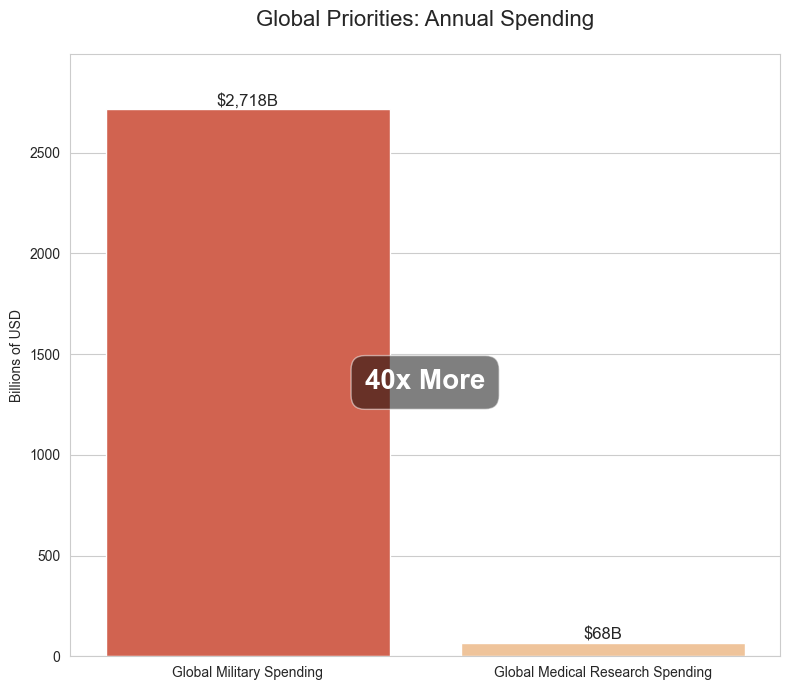

Chart saved to ../../../assets/charts\military_vs_research_spending.png


In [12]:
# --- Visualization: Global Priorities - Military vs. Medical Research Spending ---

# Data for comparison
# Military spending is from the 'Cost of War' analysis above.
# Medical research spending data from brain/reference/global-government-medical-research-spending.md
medical_research_spending = 67.5 # in billions of USD

spending_data = {
    'Category': ['Global Military Spending', 'Global Medical Research Spending'],
    'Amount ($B)': [direct_military_expenditure, medical_research_spending]
}
spending_df = pd.DataFrame(spending_data)

# Create the bar chart
plt.figure(figsize=(8, 7))
spend_plot = sns.barplot(x='Category', y='Amount ($B)', data=spending_df, palette='OrRd_r')

# Add labels to the bars
for bar in spend_plot.patches:
    spend_plot.text(bar.get_x() + bar.get_width() / 2,
                   bar.get_height(),
                   f'${bar.get_height():,.0f}B',
                   ha='center', va='bottom', fontsize=12)

# Add a text annotation for the multiple
multiple = direct_military_expenditure / medical_research_spending
plt.text(0.5, max(spending_df['Amount ($B)']) / 2, f'{multiple:.0f}x More', 
         ha='center', va='center', fontsize=20, color='white', weight='bold',
         bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.5'))

plt.title('Global Priorities: Annual Spending', fontsize=16, pad=20)
plt.xlabel('')
plt.ylabel('Billions of USD')
plt.xticks(rotation=0)
plt.ylim(0, direct_military_expenditure * 1.1)
plt.tight_layout()

# Save the figure
file_path = os.path.join(charts_dir, 'military_vs_research_spending.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')

plt.show()

print(f'Chart saved to {file_path}')


C:\Users\m\AppData\Local\Temp\ipykernel_28736\2263339405.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  disease_plot = sns.barplot(x='Category', y='Amount ($B)', data=disease_funding_df, palette='Reds_r')


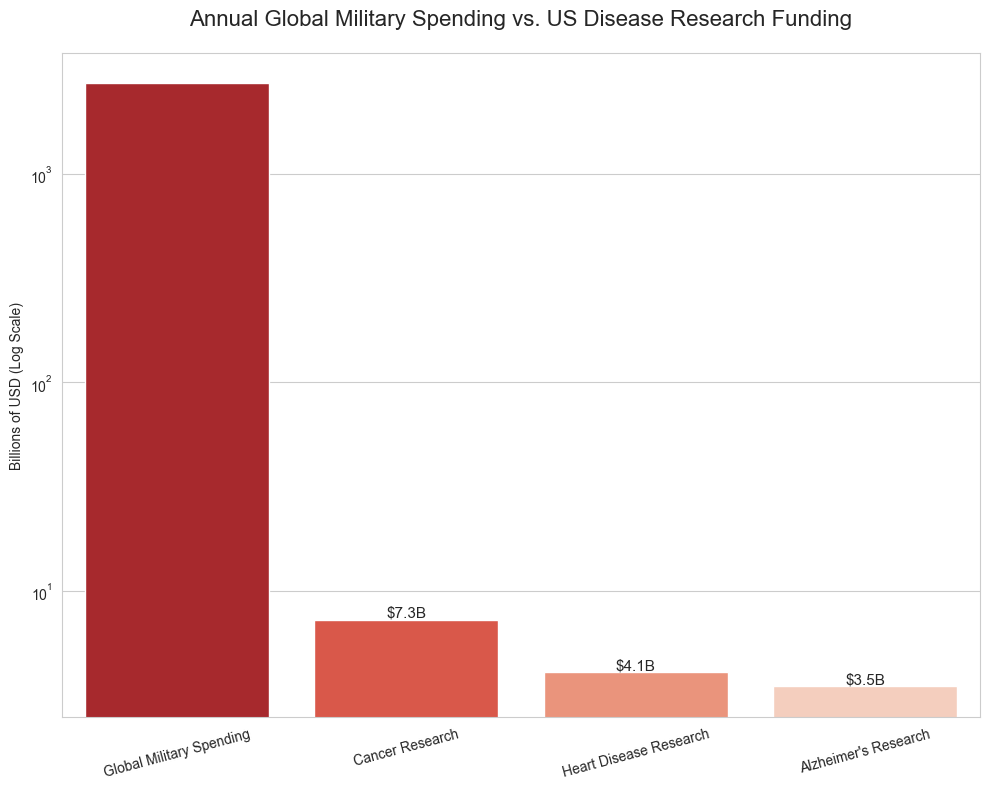

Chart saved to ../../../assets/charts\military_vs_disease_spending.png


In [13]:
# --- Visualization: Military Spending vs. Top 3 Disease Research ---

# Data for comparison. Military spending is from the 'Cost of War' analysis.
# Disease research funding figures are based on latest available NIH data (in billions USD).
# Source: https://www.nih.gov/about-nih/what-we-do/budget
disease_funding_data = {
    'Category': ['Global Military Spending', 'Cancer Research', 'Heart Disease Research', 'Alzheimer\'s Research'],
    'Amount ($B)': [
        direct_military_expenditure,
        7.3, # NCI
        4.1, # NHLBI
        3.5, # NIA
    ]
}
disease_funding_df = pd.DataFrame(disease_funding_data)

# Create the bar chart
plt.figure(figsize=(10, 8))
disease_plot = sns.barplot(x='Category', y='Amount ($B)', data=disease_funding_df, palette='Reds_r')

# Add labels to the bars
for bar in disease_plot.patches:
    # Don't label the huge military spending bar as it will be off the chart in log scale
    if bar.get_height() < 1000:
        disease_plot.text(bar.get_x() + bar.get_width() / 2,
                       bar.get_height(),
                       f'${bar.get_height():,.1f}B',
                       ha='center', va='bottom', fontsize=11)

plt.title('Annual Global Military Spending vs. US Disease Research Funding', fontsize=16, pad=20)
plt.xlabel('')
plt.ylabel('Billions of USD (Log Scale)')
plt.xticks(rotation=15)

# Use a log scale to make the disease funding bars visible
plt.yscale('log')

plt.tight_layout()

# Save the figure
file_path = os.path.join(charts_dir, 'military_vs_disease_spending.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')

plt.show()

print(f'Chart saved to {file_path}')


C:\Users\m\AppData\Local\Temp\ipykernel_28736\1830514066.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Savings ($B)', y='Category', data=savings_df, palette='viridis')


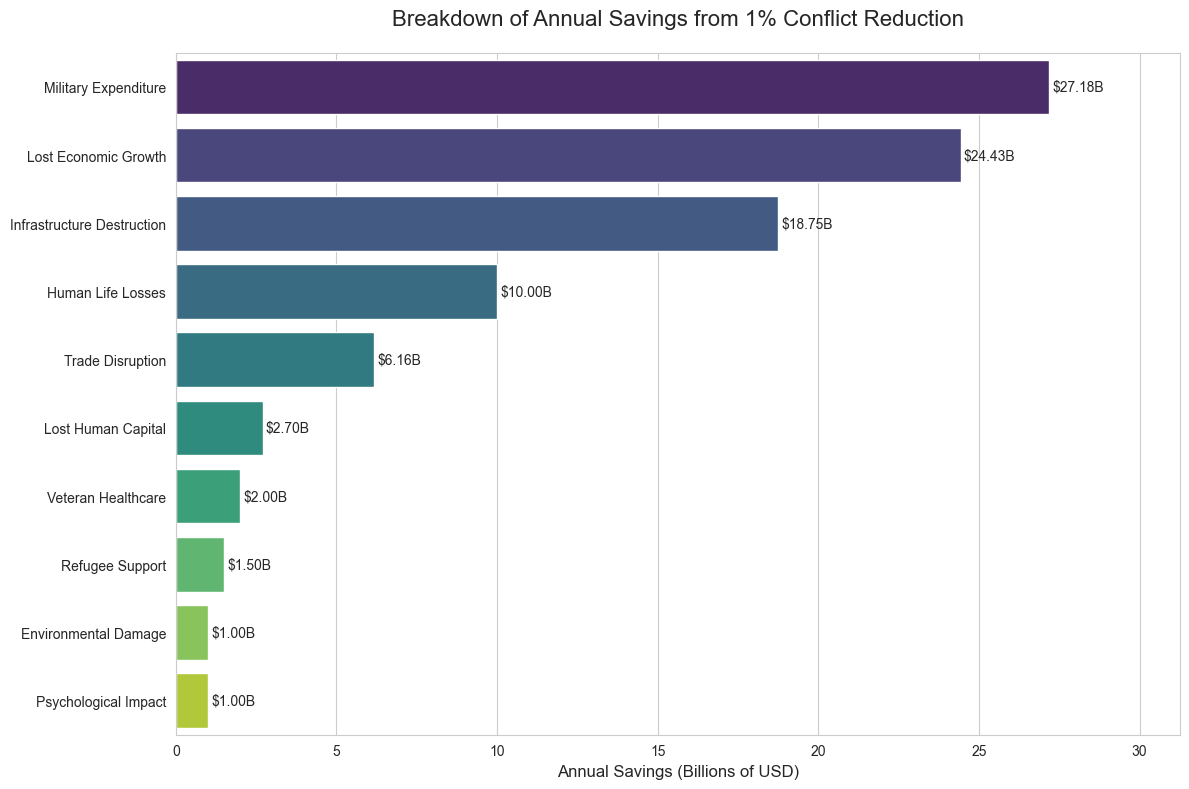

Chart saved to ../../../assets/charts\peace_dividend_breakdown.png


In [14]:
# --- Visualization: Breakdown of the Societal Dividend ---

# Create a DataFrame for the breakdown of savings
savings_data = {
    'Category': [
        'Military Expenditure', 'Lost Economic Growth', 'Infrastructure Destruction', 'Human Life Losses', 
        'Trade Disruption', 'Lost Human Capital', 'Veteran Healthcare', 
        'Refugee Support', 'Environmental Damage', 'Psychological Impact'
    ],
    'Savings ($B)': [
        direct_military_expenditure * reduction_percentage,
        lost_economic_growth * reduction_percentage,
        infrastructure_destruction * reduction_percentage,
        human_life_losses * reduction_percentage,
        trade_disruption * reduction_percentage,
        lost_human_capital * reduction_percentage,
        veteran_healthcare * reduction_percentage,
        refugee_support * reduction_percentage,
        environmental_damage * reduction_percentage,
        psychological_impact * reduction_percentage
    ]
}
savings_df = pd.DataFrame(savings_data).sort_values(by='Savings ($B)', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Savings ($B)', y='Category', data=savings_df, palette='viridis')

# Add labels to the bars
for bar in barplot.patches:
    barplot.text(bar.get_width() + 0.1,  # x position
                 bar.get_y() + bar.get_height() / 2, # y position
                 f'${bar.get_width():,.2f}B', # text
                 va='center')

plt.title('Breakdown of Annual Savings from 1% Conflict Reduction', fontsize=16, pad=20)
plt.xlabel('Annual Savings (Billions of USD)', fontsize=12)
plt.ylabel('')
plt.xlim(0, max(savings_df['Savings ($B)']) * 1.15) # Adjust x-axis limit for labels
plt.tight_layout()

# Save the figure
file_path = os.path.join(charts_dir, 'peace_dividend_breakdown.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')

plt.show()

print(f'Chart saved to {file_path}')


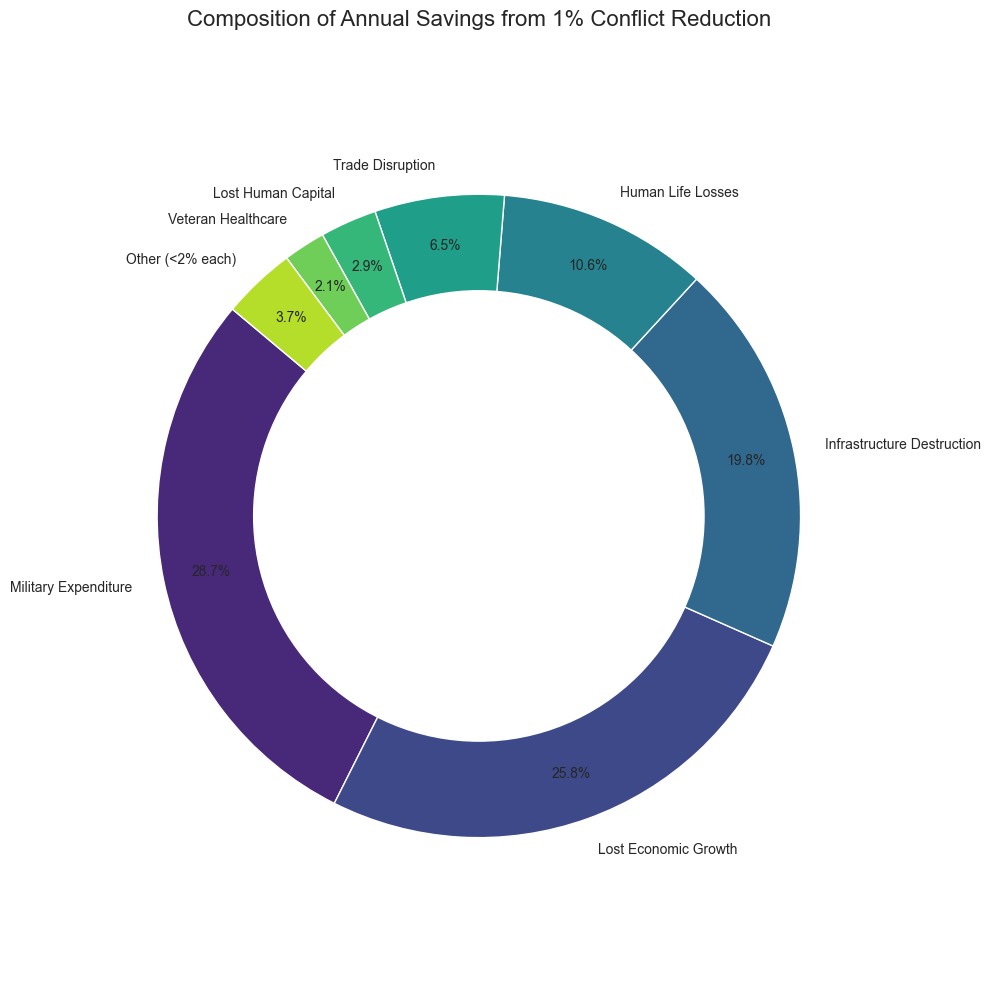

Chart saved to ../../../assets/charts\peace_dividend_pie_chart.png


In [15]:
# --- Visualization: Pie Chart of Annual Savings Breakdown ---

# To avoid clutter, we can group smaller categories into an 'Other' slice.
# Let's set a threshold, e.g., anything less than 2% of the total savings.
total_savings = savings_df['Savings ($B)'].sum()
savings_df['Percentage'] = (savings_df['Savings ($B)'] / total_savings) * 100

# Group small slices into 'Other'
threshold = 2
main_slices = savings_df[savings_df['Percentage'] >= threshold]
other_slices_value = savings_df[savings_df['Percentage'] < threshold]['Savings ($B)'].sum()

if other_slices_value > 0:
    other_df = pd.DataFrame({
        'Category': ['Other (<2% each)'], 
        'Savings ($B)': [other_slices_value],
        'Percentage': [(other_slices_value / total_savings) * 100]
    })
    plot_df = pd.concat([main_slices, other_df])
else:
    plot_df = main_slices

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(plot_df['Savings ($B)'], labels=plot_df['Category'], autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=sns.color_palette('viridis', len(plot_df)))

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Composition of Annual Savings from 1% Conflict Reduction', fontsize=16, pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Save the figure
file_path = os.path.join(charts_dir, 'peace_dividend_pie_chart.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')

plt.show()

print(f'Chart saved to {file_path}')


C:\Users\m\AppData\Local\Temp\ipykernel_28736\2750220274.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  comp_plot = sns.barplot(x='Type', y='Amount ($B)', data=dividends_df, palette='mako')


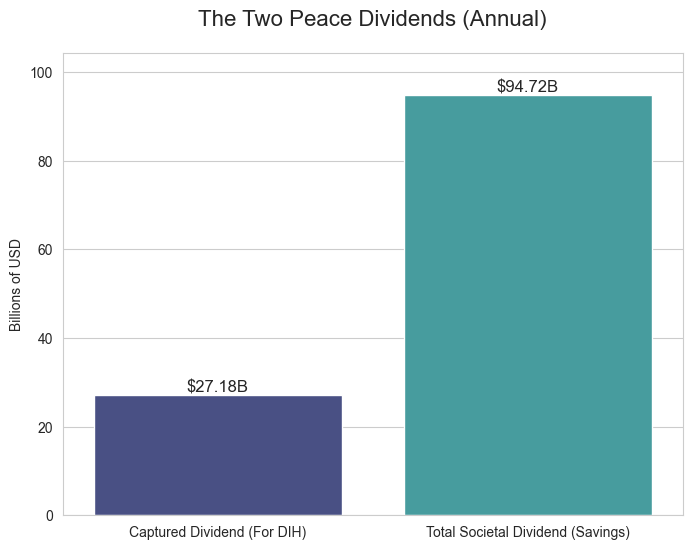

Chart saved to ../../../assets/charts\captured_vs_societal_dividend.png


In [16]:
# --- Visualization: Captured vs. Societal Dividend ---

dividends_data = {
    'Type': ['Captured Dividend (For DIH)', 'Total Societal Dividend (Savings)'],
    'Amount ($B)': [captured_dividend, societal_dividend]
}
dividends_df = pd.DataFrame(dividends_data)

plt.figure(figsize=(8, 6))
comp_plot = sns.barplot(x='Type', y='Amount ($B)', data=dividends_df, palette='mako')

# Add labels to the bars
for bar in comp_plot.patches:
    comp_plot.text(bar.get_x() + bar.get_width() / 2, # x position
                   bar.get_height(), # y position
                   f'${bar.get_height():,.2f}B', # text
                   ha='center', va='bottom', fontsize=12)


plt.title('The Two Peace Dividends (Annual)', fontsize=16, pad=20)
plt.xlabel('')
plt.ylabel('Billions of USD')
plt.ylim(0, societal_dividend * 1.1) # Adjust y-axis limit for labels

# Save the figure
file_path = os.path.join(charts_dir, 'captured_vs_societal_dividend.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')

plt.show()

print(f'Chart saved to {file_path}')


## 2. Sensitivity Analysis for the Peace Dividend

A key principle of rigorous economic modeling is to test the assumptions to understand how they impact the final conclusions. A sensitivity analysis allows us to see how the "Societal Dividend" changes when we vary our key inputs.

In this analysis, we will vary two key parameters simultaneously:
1.  **Reduction Percentage**: We will model a range of reductions from 0.5% to 2.0% to see the impact of partial or greater-than-expected success.
2.  **Accuracy of Indirect Cost Estimates**: The indirect costs of war (like lost economic growth) are harder to quantify than direct spending. We will model a scenario where these costs might be overestimated or underestimated by 25%.

This will create a matrix of possible outcomes, giving us a more robust understanding of the potential economic benefits under different scenarios.



In [17]:
# Define the ranges for the sensitivity analysis
reduction_percentages = [0.005, 0.01, 0.015, 0.02]
indirect_cost_multipliers = [0.75, 1.0, 1.25] # Represents -25%, baseline, +25%

# Create an empty list to store results
results = []

# Loop through each combination of parameters
for redux in reduction_percentages:
    for mult in indirect_cost_multipliers:
        
        # Recalculate total cost based on the multiplier for indirect costs
        adjusted_indirect_costs = total_indirect_costs * mult
        adjusted_total_cost = total_direct_costs + adjusted_indirect_costs
        
        # Calculate the societal dividend for this scenario
        dividend = adjusted_total_cost * redux
        
        # Store the result
        results.append({
            "Reduction %": f"{redux:.1%}",
            "Indirect Cost Scenario": f"{int((mult-1)*100)}%",
            "Societal Dividend ($B)": f"{dividend:,.1f}"
        })

# Create a pandas DataFrame for better display
df = pd.DataFrame(results)

# Pivot the table for a matrix-like view
pivot_df = df.pivot(index="Indirect Cost Scenario", columns="Reduction %", values="Societal Dividend ($B)")

print("--- Sensitivity Analysis: Societal Dividend ($ Billions) ---")
print(pivot_df)



--- Sensitivity Analysis: Societal Dividend ($ Billions) ---
Reduction %             0.5%   1.0%   1.5%   2.0%
Indirect Cost Scenario                           
-25%                    43.3   86.6  129.8  173.1
0%                      47.4   94.7  142.1  189.4
25%                     51.4  102.9  154.3  205.8


---
## 3. dFDA Cost-Benefit Analysis

This section models the health and economic benefits generated by the Decentralized FDA (dFDA) platform, which is funded by the "Captured Dividend" from the Peace Dividend analysis.

The model is based on the data in the full `[dFDA Cost Benefit Analysis document](./dfda-cost-benefit-analysis.md)`.

Key outputs of this model include:
-   Projected annual R&D savings.
-   Return on Investment (ROI) for the dFDA platform.
-   Estimated health gains in Quality-Adjusted Life Years (QALYs).
-   A sensitivity analysis on the key drivers of these benefits.



In [18]:
# Core parameters for the dFDA model (in billions of USD)
# Source: brain/book/economics/dfda-cost-benefit-analysis.md

global_clinical_trial_market = 100.0
dfda_rd_cost_reduction_pct = 0.50
dfda_annual_operational_cost = 0.040 # $40 million

# Baseline QALYs generated annually
qaly_gains_annual_baseline = 840000 # in QALYs, not dollars

# Value of a QALY (standard economic value, can be debated)
value_per_qaly = 150000 # Using a common benchmark of ~$150k per QALY

# --- Calculations for dFDA Benefits ---

# Gross R&D savings
gross_rd_savings = global_clinical_trial_market * dfda_rd_cost_reduction_pct

# Net R&D savings (after operational costs)
net_rd_savings = gross_rd_savings - dfda_annual_operational_cost

# ROI Calculation
# ROI = (Net Benefit / Cost)
# Here, the cost is the operational cost, and the benefit is the gross savings it unlocks.
dfda_roi = gross_rd_savings / dfda_annual_operational_cost

# Monetized value of QALY gains
monetized_qaly_value = (qaly_gains_annual_baseline * value_per_qaly) / 1_000_000_000 # Convert to billions

# --- Connecting to the Peace Dividend ---
# The captured dividend must cover the operational cost.
funding_coverage_ratio = captured_dividend / dfda_annual_operational_cost


print(f"--- dFDA Cost-Benefit Analysis (Baseline) ---")
print(f"Annual Gross R&D Savings: ${gross_rd_savings:,.1f} Billion")
print(f"Annual dFDA Operational Cost: ${dfda_annual_operational_cost:,.3f} Billion")
print(f"Return on Investment (ROI): {dfda_roi:,.0f}:1")
print("-" * 45)
print(f"Annual QALYs Gained: {qaly_gains_annual_baseline:,.0f}")
print(f"Monetized Value of Annual QALYs: ${monetized_qaly_value:,.1f} Billion")
print("-" * 45)
print(f"Funding Coverage (Captured Dividend / OpEx): {funding_coverage_ratio:,.1f}x")



--- dFDA Cost-Benefit Analysis (Baseline) ---
Annual Gross R&D Savings: $50.0 Billion
Annual dFDA Operational Cost: $0.040 Billion
Return on Investment (ROI): 1,250:1
---------------------------------------------
Annual QALYs Gained: 840,000
Monetized Value of Annual QALYs: $126.0 Billion
---------------------------------------------
Funding Coverage (Captured Dividend / OpEx): 679.5x


C:\Users\m\AppData\Local\Temp\ipykernel_28736\2274110254.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ir_plot = sns.barplot(x='Label', y='Value ($B)', data=investment_return_df, palette=investment_return_df['Color'])


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

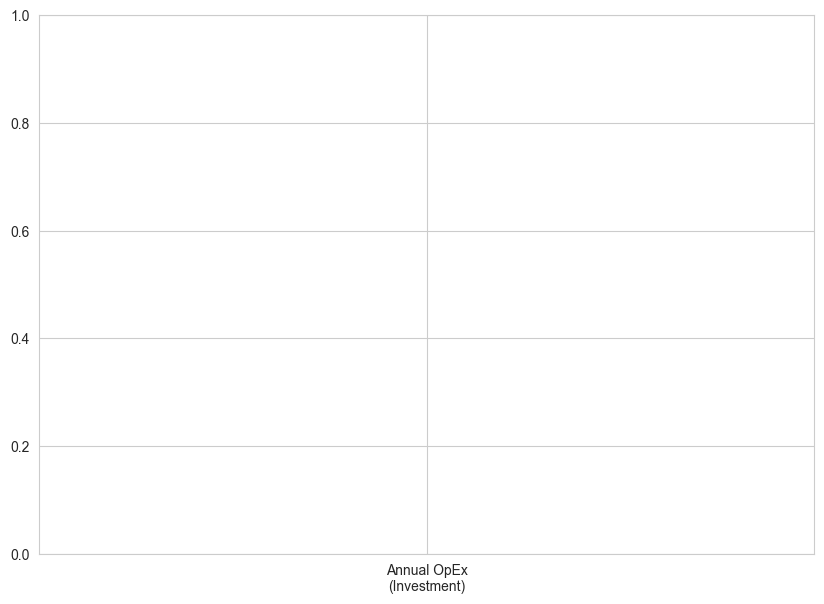

In [19]:
# --- Visualization: dFDA Investment vs. Returns ---

# Data for the bar chart
investment_return_data = {
    'Label': ['Annual OpEx\n(Investment)', 'Annual R&D Savings\n(Financial Return)', 'Annual Health Gains\n(Monetized Value)'],
    'Value ($B)': [dfda_annual_operational_cost, gross_rd_savings, monetized_qaly_value],
    'Color': ['tomato', 'limegreen', 'deepskyblue']
}
investment_return_df = pd.DataFrame(investment_return_data)

# Create the bar chart
plt.figure(figsize=(10, 7))
ir_plot = sns.barplot(x='Label', y='Value ($B)', data=investment_return_df, palette=investment_return_df['Color'])

# Add labels to the bars
for bar in ir_plot.patches:
    y_val = bar.get_height()
    ir_plot.text(bar.get_x() + bar.get_width() / 2.0, y_val, f'${y_val:,.1f}B', va='bottom', ha='center', fontsize=12)

plt.title('dFDA: Annual Investment vs. Unlocked Returns', fontsize=16, pad=20)
plt.xlabel('')
plt.ylabel('Value (Billions of USD) - Log Scale')
plt.xticks(rotation=0)

# Using a log scale to show the vast difference in magnitude
plt.yscale('log')
# Adjust y-axis limits to ensure the smallest bar is visible and has space for its label
plt.ylim(0.01, monetized_qaly_value * 2) 

plt.tight_layout()

# Save the figure
file_path = os.path.join(charts_dir, 'dfda_roi_comparison.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')

plt.show()

print(f'Chart saved to {file_path}')


## 4. Sensitivity Analysis for the dFDA Model

This sensitivity analysis explores how the dFDA's financial viability, specifically its Return on Investment (ROI), changes under different assumptions. We will test the two most critical drivers of the financial model:

1.  **R&D Cost Reduction %**: The actual savings achieved could be lower or higher than our 50% baseline. We will model a range from 30% to 70%.
2.  **Annual Operational Cost**: The platform could be cheaper or more expensive to run than the estimated $40M. We will model a range from $20M to $80M.

This matrix will show the ROI under various performance scenarios, from conservative to optimistic.



In [ ]:
# Define the ranges for the dFDA sensitivity analysis
rd_reduction_scenarios = [0.3, 0.4, 0.5, 0.6, 0.7]
operational_cost_scenarios = [0.020, 0.040, 0.060, 0.080] # In billions of USD

# Create an empty list to store results
dfda_results = []

# Loop through each combination of parameters
for redux_pct in rd_reduction_scenarios:
    for op_cost in operational_cost_scenarios:
        
        # Recalculate gross savings for this scenario
        gross_savings = global_clinical_trial_market * redux_pct
        
        # Recalculate ROI for this scenario
        # Handle case where op_cost is zero to avoid division error, though not in our scenarios
        if op_cost > 0:
            roi = gross_savings / op_cost
        else:
            roi = float('inf')

        # Store the result
        dfda_results.append({
            "R&D Reduction %": f"{redux_pct:.0%}",
            "Annual OpEx ($B)": f"${op_cost:.3f}",
            "ROI (x:1)": f"{roi:,.0f}"
        })

# Create and pivot the DataFrame
dfda_df = pd.DataFrame(dfda_results)
dfda_pivot = dfda_df.pivot(index="Annual OpEx ($B)", columns="R&D Reduction %", values="ROI (x:1)")

print("--- Sensitivity Analysis: dFDA Return on Investment (ROI) ---")
print(dfda_pivot)



--- Sensitivity Analysis: dFDA Return on Investment (ROI) ---
R&D Reduction %     30%    40%    50%    60%    70%
Annual OpEx ($B)                                   
$0.020            1,500  2,000  2,500  3,000  3,500
$0.040              750  1,000  1,250  1,500  1,750
$0.060              500    667    833  1,000  1,167
$0.080              375    500    625    750    875


---
## 5. Rigorous Financial Model: Net Present Value (NPV) Analysis

The simple ROI calculation is useful for a high-level summary, but a more rigorous financial analysis uses **Net Present Value (NPV)**. This method accounts for the "time value of money" by using a discount rate to value future savings and costs in today's dollars. It provides a much more accurate picture of the investment's long-term value.

This model is based on the detailed framework in the `dfda-cost-benefit-analysis.md` document and calculates:
1.  The NPV of all costs (upfront and operational) over a 10-year horizon.
2.  The NPV of all savings (ramping up as the platform is adopted).
3.  A more robust ROI and Net Benefit based on these NPV figures.



In [ ]:
# NPV Model Parameters
# Source: brain/book/economics/dfda-cost-benefit-analysis.md -> "Example Parameterization" section

# Costs (in billions USD)
# Combines core platform build + medium broader initiative setup costs
C0 = 0.26975  # Upfront Costs
# Combines core platform ops + medium broader initiative annual costs
Cop = 0.04005   # Annual Operational Costs (constant)

# Savings (in billions USD)
Rd = 100.0  # Annual Global R&D Spend on clinical trials
alpha = 0.50  # Fraction of R&D cost saved

# Financial Parameters
r = 0.08  # Annual discount rate
T = 10    # Time horizon in years

# Adoption Curve p(t)
# Linear ramp from 0% to 100% over 5 years, then constant at 100%
def adoption_rate(t):
    if t == 0:
        return 0
    elif t <= 5:
        return t / 5
    else:
        return 1.0

print("NPV Model Parameters Loaded.")
print(f"Upfront Cost (C0): ${C0:.4f}B")
print(f"Annual OpEx (Cop): ${Cop:.4f}B")
print(f"Discount Rate (r): {r:.0%}")
print(f"Time Horizon (T): {T} years")



NPV Model Parameters Loaded.
Upfront Cost (C0): $0.2697B
Annual OpEx (Cop): $0.0401B
Discount Rate (r): 8%
Time Horizon (T): 10 years


In [ ]:
import numpy as np
import numpy_financial as npf

# --- NPV of Costs ---
# Create a stream of operational costs over the time horizon
operational_costs_stream = [Cop] * T
# The npv function in numpy_financial takes the rate and a stream of cash flows.
# It assumes the first cash flow is at t=1.
npv_of_ops = npf.npv(r, operational_costs_stream)
# Total NPV of costs is the upfront cost plus the discounted stream of operational costs
npv_costs = C0 + npv_of_ops

# --- NPV of Savings ---
# Calculate the annual savings for each year, considering the adoption rate
annual_savings_stream = [(adoption_rate(t) * alpha * Rd) for t in range(1, T + 1)]
# Calculate the NPV of this savings stream
npv_savings = npf.npv(r, annual_savings_stream)

# --- Final ROI and Net Benefit ---
robust_roi = npv_savings / npv_costs
net_benefit = npv_savings - npv_costs

# --- Display Results ---
print("--- Rigorous Financial Analysis Results ---")
print(f"NPV of Total Costs over {T} years: ${npv_costs:,.3f} Billion")
print(f"NPV of Total Savings over {T} years: ${npv_savings:,.3f} Billion")
print("-" * 40)
print(f"Net Benefit (NPV Savings - NPV Costs): ${net_benefit:,.3f} Billion")
print(f"Robust ROI (NPV Savings / NPV Costs): {robust_roi:,.0f}:1")



--- Rigorous Financial Analysis Results ---
NPV of Total Costs over 10 years: $0.560 Billion
NPV of Total Savings over 10 years: $269.482 Billion
----------------------------------------
Net Benefit (NPV Savings - NPV Costs): $268.922 Billion
Robust ROI (NPV Savings / NPV Costs): 481:1


In [ ]:
# --- Visualization: NPV of Costs vs. Savings Over Time ---

# Calculate cumulative NPV streams for plotting
years = np.arange(1, T + 1)
cumulative_npv_costs = [C0] # Start with upfront cost at year 0
cumulative_npv_savings = [0] # No savings at year 0

# We need non-cumulative discounted streams first
discounted_ops_stream = [Cop / ((1+r)**t) for t in years]
discounted_savings_stream = [s / ((1+r)**t) for t, s in enumerate(annual_savings_stream, 1)]

# Now calculate cumulative sums
cumulative_npv_costs.extend(C0 + np.cumsum(discounted_ops_stream))
cumulative_npv_savings.extend(np.cumsum(discounted_savings_stream))

# Create a DataFrame for plotting
npv_df = pd.DataFrame({
    'Year': np.arange(0, T + 1),
    'Cumulative NPV of Costs ($B)': cumulative_npv_costs,
    'Cumulative NPV of Savings ($B)': cumulative_npv_savings
})
npv_df['Net Benefit ($B)'] = npv_df['Cumulative NPV of Savings ($B)'] - npv_df['Cumulative NPV of Costs ($B)']

# Plotting
plt.figure(figsize=(12, 8))

# Plotting the lines
plt.plot(npv_df['Year'], npv_df['Cumulative NPV of Savings ($B)'], label='Cumulative Savings', color='green', marker='o')
plt.plot(npv_df['Year'], npv_df['Cumulative NPV of Costs ($B)'], label='Cumulative Costs', color='red', marker='o')

# Filling the area between the lines to show Net Benefit
plt.fill_between(npv_df['Year'], npv_df['Cumulative NPV of Costs ($B)'], npv_df['Cumulative NPV of Savings ($B)'], 
                 where=(npv_df['Cumulative NPV of Savings ($B)'] > npv_df['Cumulative NPV of Costs ($B)']),
                 color='green', alpha=0.2, interpolate=True, label='Net Benefit')
                 
plt.fill_between(npv_df['Year'], npv_df['Cumulative NPV of Costs ($B)'], npv_df['Cumulative NPV of Savings ($B)'], 
                 where=(npv_df['Cumulative NPV of Savings ($B)'] <= npv_df['Cumulative NPV of Costs ($B)']),
                 color='red', alpha=0.2, interpolate=True, label='Initial Investment')

plt.title(f'NPV of Costs vs. Savings over {T} Years', fontsize=16, pad=20)
plt.xlabel('Year')
plt.ylabel('Cumulative NPV (Billions of USD)')
plt.xticks(np.arange(0, T + 1, 1))
plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.tight_layout()

# Save the figure
file_path = os.path.join(charts_dir, 'npv_over_time.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')

plt.show()

print(f'Chart saved to {file_path}')


---
## 6. Final Summary: The Complete Value Proposition

This final section synthesizes the findings from the Peace Dividend and dFDA models to present the total annual benefit to society.

The model demonstrates two distinct and massive wins:

1.  **The Peace Dividend**: A standalone economic benefit from reduced conflict.
2.  **The dFDA Bonus**: An additional economic and health benefit unlocked by reinvesting a fraction of the peace dividend.



In [ ]:
# --- Total Annual Benefit Calculation ---

# Win #1: The Societal Dividend from less conflict
win_1_peace_dividend = societal_dividend

# Win #2: The additional Gross R&D Savings unlocked by the dFDA
win_2_dfda_bonus = gross_rd_savings

# Total combined annual benefit to society
total_annual_benefit = win_1_peace_dividend + win_2_dfda_bonus

# Print the final summary
print("--- The Complete Value Proposition ---\n")
print("This initiative creates two massive, independent wins for the world:\n")
print(f"1. The Peace Dividend: Society gets ${win_1_peace_dividend:,.2f} Billion richer every year from less conflict.")
print(f"2. The dFDA Bonus: We use a fraction of that dividend to unlock an *additional* ${win_2_dfda_bonus:,.2f} Billion in R&D savings.")
print("-" * 50)
print(f"Total Combined Annual Benefit to Society: ${total_annual_benefit:,.2f} Billion")
print(f"Plus {qaly_gains_annual_baseline:,.0f} extra years of healthy life, every year.")



--- The Complete Value Proposition ---

This initiative creates two massive, independent wins for the world:

1. The Peace Dividend: Society gets $91.97 Billion richer every year from less conflict.
2. The dFDA Bonus: We use a fraction of that dividend to unlock an *additional* $50.00 Billion in R&D savings.
--------------------------------------------------
Total Combined Annual Benefit to Society: $141.97 Billion
Plus 840,000 extra years of healthy life, every year.


In [ ]:
# --- Visualization: The Two-Part Annual Benefit ---

# Data for the stacked bar chart
benefit_data = {
    'Peace Dividend': [win_1_peace_dividend],
    'dFDA R&D Savings': [win_2_dfda_bonus]
}
benefit_df = pd.DataFrame(benefit_data)

# Create the stacked bar chart
ax = benefit_df.plot(kind='bar', stacked=True, figsize=(8, 7), colormap='coolwarm_r')

# Add labels
for c in ax.containers:
    # Get the height of the bar segments
    labels = [f'${v:,.1f}B' if v > 0 else '' for v in c.datavalues]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=12, color='white', weight='bold')

# Add total label
total_val = benefit_df.sum(axis=1).iloc[0]
ax.text(0, total_val, f'Total:\n${total_val:,.1f}B', ha='center', va='bottom', fontsize=14, weight='bold')

plt.title('Total Combined Annual Benefit to Society', fontsize=16, pad=20)
plt.ylabel('Billions of USD')
plt.xticks([]) # Remove x-tick labels
plt.xlabel('Two Independent Wins')
plt.legend(title='Benefit Source')
plt.ylim(0, total_val * 1.2)
plt.tight_layout()

# Save the figure
file_path = os.path.join(charts_dir, 'total_annual_benefit.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')

plt.show()

print(f'Chart saved to {file_path}')
